**643020493-9 นายศุภวิชญ์  จำรัส**

**643021249-5 นางสาวลิมาลัย ปิยะแสง**

# **Import Library**

**import pandas** ไว้ใช้สร้าง Dataframe

**import numpy** ไว้ใช้ในการจัดการชุดข้อมูล

**import matplotlib** ไว้ใช้ในการสร้างกราฟ

**import seaborn** เพื่อใช้ในการพล็อตกราฟ

**import requests** เพื่อใช้ในการดึงข้อมูล

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
%matplotlib inline

# **Import CSV file from Github to Colab**

ในส่วนนี้ได้ทำการ upload ไฟล์ csv ขึ้นไปไว้บน github เพื่อความสะดวกในดาวน์โหลดการนำมาใช้งาน

---


Main datasets from:

https://www.kaggle.com/datasets/shivamb/netflix-shows

https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows

https://www.kaggle.com/datasets/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

In [ ]:
#url = 'link(url) raw ที่ upload ไว้บน github'
netflix_url = 'https://raw.githubusercontent.com/spw32767/EDAproject/main/netflix_titles.csv'
disney_url = 'https://raw.githubusercontent.com/spw32767/EDAproject/main/disney_plus_titles.csv'

#ดึงข้อมูลมาใส่ไว้ใน Dataframe
df_nf  = pd.read_csv(netflix_url) #df_nf = dataframe netflix
df_dp = pd.read_csv(disney_url) #df_dp = dataframe disney

In [ ]:
#สร้างตัวแปรเก็บค่าสีเพื่อใช้ในการพล็อตกราฟ
nf_color = '#E50914'
dp_color = '#113CCF'
white_color = '#FFFFFF'
bg_color = '#363336'

## **แสดงหัวข้อของ column ทั้งหมด**
เช็คจำนวน column ของทั้งสอง การที่จำนวน column เท่ากันทำให้ง่ายต่อการวิเคราะห์ข้อมูล

In [ ]:
print(f'หัวข้อ column ของ Netflix:\n\n {df_nf.columns}\n')
print(f'หัวข้อ column ของ Disney+:\n\n {df_dp.columns}')

หัวข้อ column ของ Netflix:

 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

หัวข้อ column ของ Disney+:

 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


***จะได้อย่างละ 12 column***

**Netflix:**


> ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in', 'description']


**Disney+**


> ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in', 'description']


---

***แบ่งเป็น 3 type***

**String**      :      10 (show_id, type, title, director, cast, country, rating, duration, listed_in, description)

**DateTime** : 1 (date_added)

**Integer**    : 1 (release_year)


## **แสดงจำนวน row ทั้งหมด**

In [ ]:
print(f'จำนวน Row ทั้งหมดของ Netflix   : {len(df_nf)}\n')
print(f'จำนวน Row ทั้งหมดของ Disney  : {len(df_dp)}')

จำนวน Row ทั้งหมดของ Netflix   : 8807

จำนวน Row ทั้งหมดของ Disney  : 1450


# **Exploratory Data Analysis**

ขั้นตอนแรกคือทำการเช็คว่าในชุดข้อมูลมี null อยู่ทั้งหมดกี่ตัว

In [ ]:
#df_nf.isnull().sum()
print(f'Netflix:\n{df_nf.isnull().sum()}\n')
print(f'Disney:\n{df_dp.isnull().sum()}')

Netflix:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Disney:
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


เราจะทำการ drop ข้อมูล director, cast และ country เนื่องจากมีข้อมูล null มากอาจจะส่งผลต่อการจัดการข้อมูลได้ และข้อมูลในส่วนนี้ไม่จำเป็นในการวิเคราะห์

In [ ]:
#drop director, cast และ country
df_nf = df_nf.drop(['director','cast', 'country'], axis = 1) #axis = 0 คือ row | axis = 1 คือ column
df_dp = df_dp.drop(['director','cast', 'country'], axis = 1)

แทนที่ Missing Values ที่เหลือให้หมด

In [ ]:
#แทนที่ Missing Values ใน rating ด้วย NR = No Rated
df_nf['rating'].replace(to_replace = np.nan, value = "NR",inplace=True)
df_dp['rating'].replace(to_replace = np.nan, value = "NR",inplace=True)

#แทนที่ Missing Values ใน date_added ด้วย method: ffill
df_nf['date_added']= df_nf['date_added'].fillna(method="ffill")
df_dp['date_added']= df_dp['date_added'].fillna(method="ffill")

#แทนที่ Missing Values ใน duration ด้วย method: ffill
df_nf['duration']= df_nf['duration'].fillna(method="ffill")

In [ ]:
#ทำการเช็คว่าในชุดข้อมูลมี null เหลือยู่กี่ตัว
print(f'Netflix:\n{df_nf.isnull().sum()}\n')
print(f'Disney:\n{df_dp.isnull().sum()}')

Netflix:
show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Disney:
show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


เมื่อเช็คแล้วไม่มีข้อมูล null เหลืออยู่ จึงสามารถเริ่มทำการวิเคราะห์ข้อมูล

In [ ]:
#เช็ครูปแบบชุดข้อมูล Netflix
df_nf.head(5)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#เช็ครูปแบบชุดข้อมูล Disney+
df_dp.head(5)

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,"November 25, 2021",2021,NR,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


## **ประเภทของหนัง ระหว่าง Netflix และ Disney+**

In [ ]:
df_nf['listed_in'].value_counts() #นับจำนวนประเภทของหนังจาก Netflix โดยใช้ column 'list_in'

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [ ]:
df_dp['listed_in'].value_counts() #นับจำนวนประเภทของหนังจาก Disney+ โดยใช้ column 'list_in'

Animation, Comedy, Family                        124
Action-Adventure, Animation, Comedy               77
Action-Adventure, Animation, Kids                 45
Action-Adventure, Animation, Family               40
Animals & Nature, Documentary, Family             40
                                                ... 
Animals & Nature, Family, Reality                  1
Dance, Music, Musical                              1
Comedy, Family, Lifestyle                          1
Buddy, Docuseries                                  1
Action-Adventure, Animals & Nature, Animation      1
Name: listed_in, Length: 329, dtype: int64

ทำการหาจำนวนของประเภทหนังที่มีคาดว่าจำนวนผู้ชมมากที่สุดของทั้งสองแอพพลิเคชั่น

In [ ]:
#ใช้ library requests ในการดึง raw data จากไฟล์ csv
snapshot_nf = requests.get(netflix_url)
raw_nf = snapshot_nf.text

#หา keyword ที่ต้องการโดยใช้ re.findall
drama=re.findall('Drama\S',raw_nf)
comedy=re.findall('Comedy\S',raw_nf)
triller=re.findall('Thrillers\S',raw_nf)
musical=re.findall('Musical\S',raw_nf)
adventure=re.findall('Adventure\S',raw_nf)
animation=re.findall('Animation\S',raw_nf)
family=re.findall('Family\S',raw_nf)
kid=re.findall('Kid\S',raw_nf)
Documentaries=re.findall('Documentaries\S',raw_nf)

#สร้างตัว count ไว้นับข้อมูล
count_drama=0
count_comedy=0
count_triller=0
count_musical=0
count_adventure=0
count_animation=0
count_family=0
count_kid=0
count_Documentaries=0

#นับจำนวนประเภทของหนัง
for x in drama:
  count_drama+=1
for x in comedy:
  count_comedy+=1
for x in triller:
  count_triller+=1
for x in musical:
  count_musical+=1
for x in adventure:
  count_adventure+=1
for x in animation:
  count_animation+=1
for x in family:
  count_family+=1
for x in kid:
  count_kid+=1
for x in Documentaries:
  count_Documentaries+=1


In [ ]:
#นำข้อมูลที่นับได้มาเก็บไว้
type_nf=[count_drama,count_comedy,count_triller,count_musical,count_adventure,count_animation,count_family,count_kid,count_Documentaries]
type_nf

[3194, 349, 634, 377, 1065, 4, 22, 519, 869]

In [ ]:
#ใช้ library requests ในการดึง raw data จากไฟล์ csv
snapshot_dp = requests.get(disney_url)
raw_dp = snapshot_dp.text

#หา keyword ที่ต้องการโดยใช้ re.findall
drama=re.findall('Drama\S',raw_dp)
comedy=re.findall('Comedy\S',raw_dp)
triller=re.findall('Thrillers\S',raw_dp)
musical=re.findall('Musical\S',raw_dp)
adventure=re.findall('Adventure\S',raw_dp)
animation=re.findall('Animation\S',raw_dp)
family=re.findall('Family\S',raw_dp)
kid=re.findall('Kid\S',raw_dp)
Documentaries=re.findall('Documentaries\S',raw_dp)

#สร้างตัว count ไว้นับข้อมูล
count_drama=0
count_comedy=0
count_triller=0
count_musical=0
count_adventure=0
count_animation=0
count_family=0
count_kid=0
count_Documentaries=0

#นับจำนวนประเภทของหนัง
for x in drama:
  count_drama+=1
for x in comedy:
  count_comedy+=1
for x in triller:
  count_triller+=1
for x in musical:
  count_musical+=1
for x in adventure:
  count_adventure+=1
for x in animation:
  count_animation+=1
for x in family:
  count_family+=1
for x in kid:
  count_kid+=1
for x in Documentaries:
  count_Documentaries+=1

In [ ]:
#นำข้อมูลที่นับได้มาเก็บไว้
type_dp=[count_drama,count_comedy,count_triller,count_musical,count_adventure,count_animation,count_family,count_kid,count_Documentaries]
type_dp

[135, 528, 0, 62, 478, 544, 636, 153, 0]

## **จำนวน Movie และ TV Show ระหว่าง Netflix และ Disney+**

Movie      6131
TV Show    2676
Name: type, dtype: int64

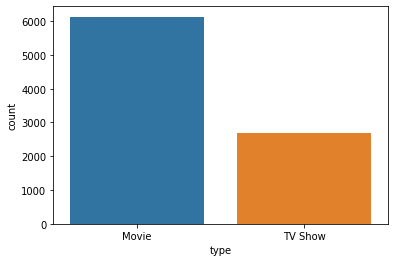

In [ ]:
#จำนวน Movie และ TV Show ของ Netflix
sns.countplot(x='type',data = df_nf)
df_nf['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

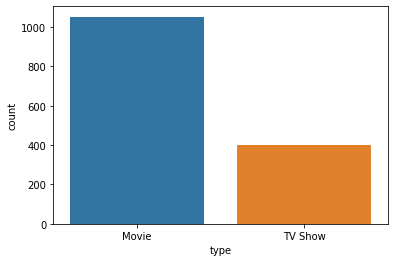

In [ ]:
#จำนวน Movie และ TV Show ของ Disney+
sns.countplot(x='type',data = df_dp)
df_dp['type'].value_counts()

**จากการวิเคราะห์**

**Netflix**



> Movie: 6131


> TV Show: 2676



**Disney+**


> Movie: 1052

> TV Show: 398


---

พบว่า **Netflix** มีจำนวน **Movie** มากกว่า **Disney+** อยู่ **5,079** เรื่อง

และ **Netflix** มีจำนวน **TV Show** มากกว่า **Disney+** อยู่ **2,278** เรื่อง










## **ประเภทและจำนวนเรทติ้ง ระหว่าง Netflix และ Disney+**



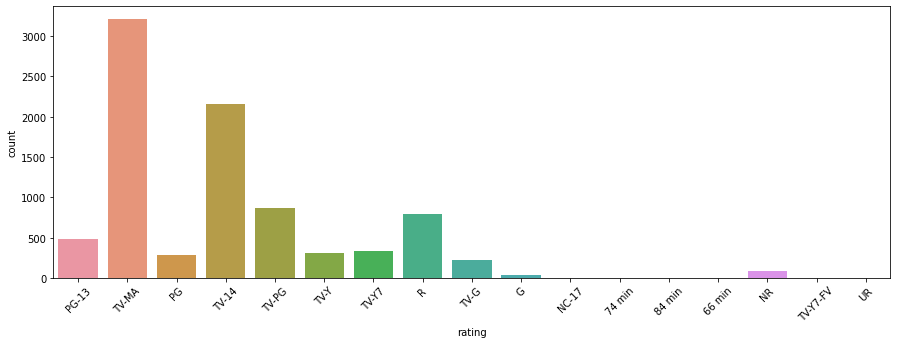

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            84
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
a,ax=plt.subplots(figsize=(15,5)) #ปรับขนาดของกราฟ
sns.countplot(data=df_nf, x="rating") #ทำการนับจำนวน rating
plt.xticks(rotation=45) #หมุนตัวหนังสือ 45 องศา
plt.show()
df_nf['rating'].value_counts() #นับจำนวน rating ใน dataframe

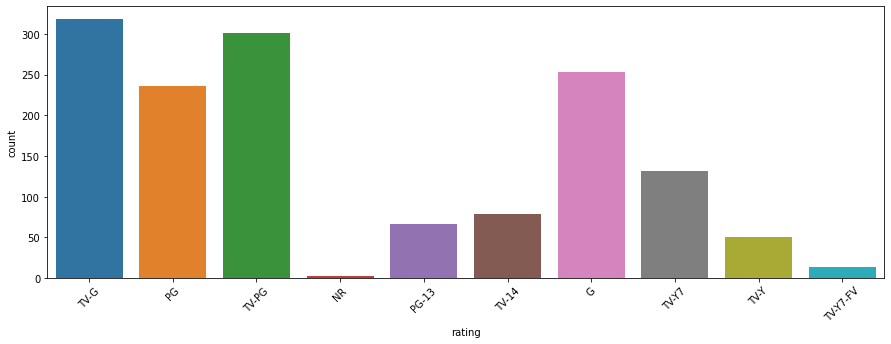

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
NR            3
Name: rating, dtype: int64

In [ ]:
a,ax=plt.subplots(figsize=(15,5)) #ปรับขนาดของกราฟ
sns.countplot(data=df_dp, x="rating") #ทำการนับจำนวน rating
plt.xticks(rotation=45) #หมุนตัวหนังสือ 45 องศา
plt.show()
df_dp['rating'].value_counts() #นับจำนวน rating ใน dataframe

**จากการวิเคราะห์**

**Netflix**


> มีจำนวนประเภท **rating** ทั้งหมด 14 ประเภท



**Disney+**


> มีจำนวนประเภท **rating** ทั้งหมด 9 ประเภท



---

พบว่า **Netflix** มีประเภทของ rating ทั้งหมดที่ **Disney+** มี

และมีประเภท **rating** ที่ **Disney+** ไม่มีดังนี้

1. **TV-MA** หรือ **Mature Audience Only** เฉพาะผู้ชมที่เป็นผู้ใหญ่เท่านั้น

2. **R** หรือ **Restricted** เด็กและเยาวชนอายุต่ำกว่า 17 ปีจะเข้าชมได้ ต่อเมื่อมีผู้ปกครองหรือผู้ใหญ่ไปด้วยเท่านั้น

3. **NR** หรือ **Not Rated** ยังไม่ได้กำหนดระดับ

4. **NC-17** หรือ **No One 17 and Under Admitted** ไม่อนุญาตให้เด็กและเยาวชนอายุต่ำกว่า 17 ปี เข้าชมโดยเด็ดขาด

5. **UR** หรือ **Unrated** ยังไม่ถูกจัดเรท

จะเห็นได้ว่า **Disney+** จะไม่มีภาพยนต์ที่ไม่เหมาะกับเด็กหรือผู้ชมที่อายุต่ำกว่า 18 ปี

## **วันที่มีการเพิ่มหนังเข้ามาระหว่าง Netflix และ Disney+**

In [ ]:
#เช็ครูปแบบของข้อมูล date_added ของ Dataframe Netflix
df_nf["date_added"].head(3)

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
Name: date_added, dtype: object

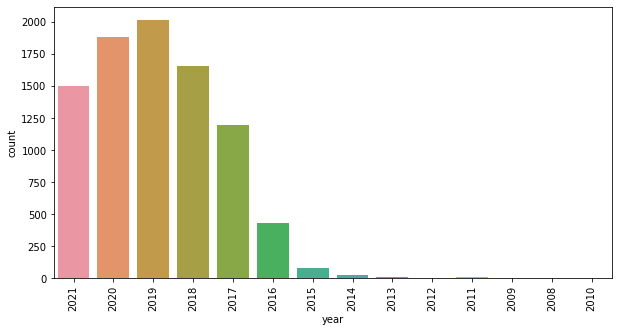


-----------Years-----------
2019    2017
2020    1879
2018    1652
2021    1498
2017    1193
2016     430
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year, dtype: int64




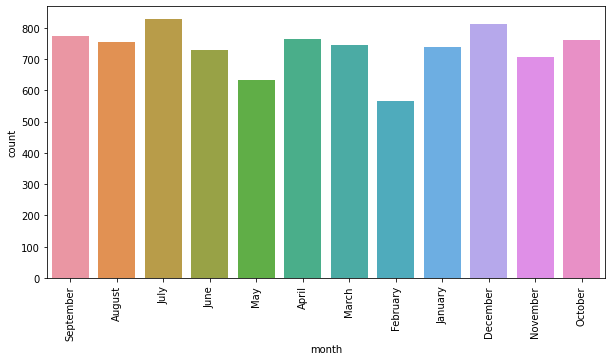


-----------Months-----------
July         827
December     813
September    772
April        765
October      761
August       755
March        743
January      738
June         729
November     705
May          634
February     565
Name: month, dtype: int64


In [ ]:
#Netflix
date_nf = df_nf[["date_added"]].dropna() #.dropna เพื่อ Missing Value

#ทำการแยกส่วนข้อมูลของเดือนและปีออกจากกัน
date_nf['year'] = date_nf["date_added"].apply(lambda i: i.split(', ')[1])
date_nf['month'] = date_nf["date_added"].apply(lambda i: i.lstrip().split(' ')[0])

#พล็อตกราฟ Years
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=date_nf['year'])
plt.show()

#นับจำนวนหนังที่เพิ่มเข้ามาในแต่ละปี
print(f'\n-----------Years-----------')
print(date_nf['year'].value_counts())
print('\n')

#พล็อตกราฟ Months
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=date_nf["month"])
plt.show()

#นับจำนวนหนังที่เพิ่มเข้ามาในแต่ละเดือน
print(f'\n-----------Months-----------')
print(date_nf['month'].value_counts())

In [ ]:
#เช็ครูปแบบของข้อมูล date_added ของ Dataframe Disney+
df_dp["date_added"].head(3)

0    November 26, 2021
1    November 26, 2021
2    November 26, 2021
Name: date_added, dtype: object

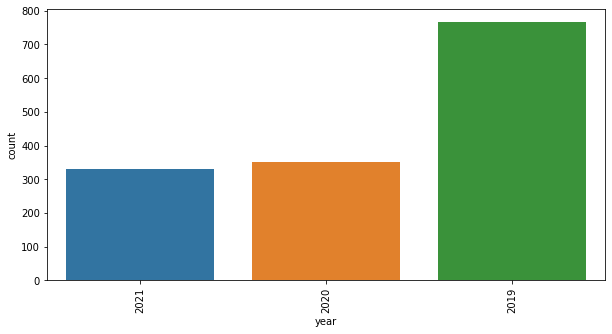


-----------Years-----------
2019    768
2020    352
2021    330
Name: year, dtype: int64




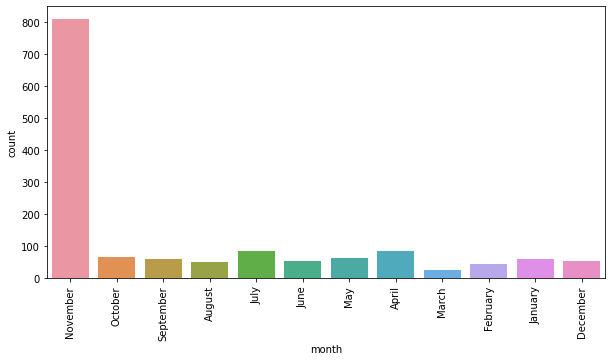


-----------Months-----------
November     809
April         86
July          85
October       66
May           62
January       61
September     59
June          52
December      52
August        50
February      44
March         24
Name: month, dtype: int64


In [ ]:
#Disney+
date_dp = df_dp[["date_added"]].dropna() #.dropna เพื่อ Missing Value

#ทำการแยกส่วนข้อมูลของเดือนและปีออกจากกัน
date_dp['year'] = date_dp["date_added"].apply(lambda i: i.split(', ')[1])
date_dp['month'] = date_dp["date_added"].apply(lambda i: i.lstrip().split(' ')[0])

#พล็อตกราฟ Years
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=date_dp['year'])
plt.show()

#นับจำนวนหนังที่เพิ่มเข้ามาในแต่ละปี
print(f'\n-----------Years-----------')
print(date_dp['year'].value_counts())
print('\n')

#พล็อตกราฟ Months
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=date_dp["month"])
plt.show()

#นับจำนวนหนังที่เพิ่มเข้ามาในแต่ละเดือน
print(f'\n-----------Months-----------')
print(date_dp['month'].value_counts())

In [ ]:
nf_specific_column = ['title', 'date_added', 'release_year']
df_nf[nf_specific_column]

,title,date_added,release_year
0,Dick Johnson Is Dead,"September 25, 2021",2020
1,Blood & Water,"September 24, 2021",2021
2,Ganglands,"September 24, 2021",2021
3,Jailbirds New Orleans,"September 24, 2021",2021
4,Kota Factory,"September 24, 2021",2021
...,...,...,...
8802,Zodiac,"November 20, 2019",2007
8803,Zombie Dumb,"July 1, 2019",2018
8804,Zombieland,"November 1, 2019",2009
8805,Zoom,"January 11, 2020",2006


## **คะแนนจาก Rotten Tomatoes ของ Netflix และ Disney+**
ในส่วนนี้จะทำการ import dataset ที่มีคะแนน **Rotten Tomatoes** ของ **Netflix** และ **Disney+** และทำการเลือกเฉพาะส่วนที่มีอยู่ใน dataset แรก

In [ ]:
#import datasets ที่มีคะแนน rotten tomatoes
#url = 'link(url) raw ที่ upload ไว้บน github'
rt_url = 'https://raw.githubusercontent.com/spw32767/EDAproject/main/MoviesOnStreamingPlatforms.csv'

#ดึงข้อมูลมาใส่ไว้ใน Dataframe
df_rt = pd.read_csv(rt_url) #df_rt = dataframe rotten tomatoes

In [ ]:
#เช็คชื่อและรูปแบบของ columns
print(f'{df_rt.columns}\n')
df_rt.head(3)

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')



,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0


เปลี่ยนชื่อ column ที่จะใช้ให้เหมือนกัน และ drop columns ที่ไม่จำเป็น

In [ ]:
#เปลี่ยนชื่อที่จะใช้ column ให้เหมือนกับ dataframe แรก
df_rt.rename(columns={'Title': 'title', 'Disney+': 'Disney'}, inplace=True)

#drop column ที่ไม่จำเป็นออก
df_rt = df_rt.drop(['Unnamed: 0','Year', 'Age', 'Hulu', 'Prime Video', 'Type'], axis = 1) #axis = 0 คือ row | axis = 1 คือ column

#เช็ค columns
print(f'{df_rt.columns}\n')

#เช็คจำนวน columns
print(df_rt['ID'].value_counts)
print('\n')

#เช็ครูปแบบ column
df_rt.head(3)

Index(['ID', 'title', 'Rotten Tomatoes', 'Netflix', 'Disney'], dtype='object')

<bound method IndexOpsMixin.value_counts of 0          1
1          2
2          3
3          4
4          5
        ... 
9510    9511
9511    9512
9512    9513
9513    9514
9514    9515
Name: ID, Length: 9515, dtype: int64>




,ID,title,Rotten Tomatoes,Netflix,Disney
0,1,The Irishman,98/100,1,0
1,2,Dangal,97/100,1,0
2,3,David Attenborough: A Life on Our Planet,95/100,1,0


รูปแบบของ **dataset** คือ ถ้าเป็นคะแนนของแอปพลิเคชั่นไหน **row** นั้นจะเป็น 1

---

ทำการสร้าง **dataframe** ใหม่ โดยแยกระหว่าง **Netflix** และ **Disney+**

โดยเอาเฉพาะชื่อเรื่องและคะแนน **Rotten Tomatoes**



In [ ]:
#สร้าง dataframe ของ Netflix
rotten_nf = df_rt[['title','Rotten Tomatoes', 'Netflix']].copy()

#สร้าง dataframe ของ Disney+
rotten_dp = df_rt[['title','Rotten Tomatoes', 'Disney']].copy()

ทำการแยกส่วนของคะแนน ระหว่าง **Netflix** และ **Disney+**

In [ ]:
#ทำการ drop Row ที่ Netflix ไม่เป็น 1
rotten_nf = rotten_nf.drop(rotten_nf[rotten_nf.Netflix == 0].index)

#เช็คจำนวนของ Netflix
print(f'จำนวนข้อมูลคะแนนที่มีของ Netflix: {len(rotten_nf.axes[0])}') #axes 0 = row | 1 = column

จำนวนข้อมูลคะแนนที่มีของ Netflix: 3695


In [ ]:
#ทำการ drop Row ที่ Disney+ ไม่เป็น 1
rotten_dp = rotten_dp.drop(rotten_dp[rotten_dp.Disney == 0].index)

#เช็คจำนวนของ Disney+
print(f'จำนวนข้อมูลคะแนนที่มีของ Disney+: {len(rotten_dp.axes[0])}') #axes 0 = row | 1 = column

จำนวนข้อมูลคะแนนที่มีของ Disney+: 922


In [ ]:
#สร้าง dataframe ใหม่ โดยใช้ข้อมูลจาก dataset แรก เพื่อที่จะนำไป merge
#Netflix
nf_merge = df_nf[['type', 'title']].copy()
#Disney+
dp_merge = df_dp[['type', 'title']].copy()

ทำการ Merge Dataset ทั้งสองเข้าด้วยกัน โดยใช้ column: 'title'

In [ ]:
merge_rt_nf = pd.merge(nf_merge, rotten_nf, on='title')
print(f'จำนวนข้อมูลคะแนนที่มีของ Netflix หลังจาก Merge: {len(merge_rt_nf.axes[0])}')

จำนวนข้อมูลคะแนนที่มีของ Netflix หลังจาก Merge: 3042


In [ ]:
merge_rt_dp = pd.merge(dp_merge, rotten_dp, on='title')
print(f'จำนวนข้อมูลคะแนนที่มีของ Disney+ หลังจาก Merge: {len(merge_rt_dp.axes[0])}')

จำนวนข้อมูลคะแนนที่มีของ Disney+ หลังจาก Merge: 734


ทำการเช็คและจัดการกับข้อมูลที่เป็น Null

In [ ]:
#เช็คข้อมูล Null
print(f'Netflix:\n{merge_rt_nf.isnull().sum()}\n')
print(f'Disney:\n{merge_rt_dp.isnull().sum()}')

#แทนที่ Missing Values ใน Rotten Tomatoes ด้วย method: ffill
merge_rt_nf['Rotten Tomatoes']= merge_rt_nf['Rotten Tomatoes'].fillna(method="ffill")

#เช็คข้อมูล Null
print(f'\nข้อมูลที่ได้หลังจากจัดการแล้ว\n')
print(f'Netflix:\n{merge_rt_nf.isnull().sum()}\n')

Netflix:
type               0
title              0
Rotten Tomatoes    7
Netflix            0
dtype: int64

Disney:
type               0
title              0
Rotten Tomatoes    0
Disney             0
dtype: int64

ข้อมูลที่ได้หลังจากจัดการแล้ว

Netflix:
type               0
title              0
Rotten Tomatoes    0
Netflix            0
dtype: int64



In [ ]:
#ทำการ split คะแนน Rotten Tomatoes เพื่อที่จะนำมาพล็อตกราฟ เนื่องจากข้อมูลไม่ได้เป็น type int

#Netflix
merge_rt_nf['Rotten Tomatoes'] = merge_rt_nf['Rotten Tomatoes'].str.split('/').str[0]
merge_rt_nf['Rotten Tomatoes'] = merge_rt_nf['Rotten Tomatoes'].astype(int) #เปลี่ยนจาก String เป็น int
#Disney+
merge_rt_dp['Rotten Tomatoes'] = merge_rt_dp['Rotten Tomatoes'].str.split('/').str[0]
merge_rt_dp['Rotten Tomatoes'] = merge_rt_dp['Rotten Tomatoes'].astype(int) #เปลี่ยนจาก String เป็น int

#เช็คข้อมูล
merge_rt_nf.head(3)

,type,title,Rotten Tomatoes,Netflix
0,Movie,Dick Johnson Is Dead,64,1
1,Movie,Dark Skies,72,1
2,Movie,Naruto Shippuden the Movie: Blood Prison,63,1


In [ ]:
#Netflix
#แบ่งช่วงของคะแนนไปเก็บไว้ใน Column Score
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 0,   'Score'] = '0-9'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 10, 'Score'] = '10-19'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 20, 'Score'] = '20-29'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 30, 'Score'] = '30-39'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 40, 'Score'] = '40-49'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 50, 'Score'] = '50-59'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 60, 'Score'] = '60-69'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 70, 'Score'] = '70-79'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 80, 'Score'] = '80-89'
merge_rt_nf.loc[merge_rt_nf['Rotten Tomatoes'] >= 90, 'Score'] = '90-100'

#Disney+
#แบ่งช่วงของคะแนนไปเก็บไว้ใน Column Score
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 0,   'Score'] = '0-9'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 10, 'Score'] = '10-19'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 20, 'Score'] = '20-29'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 30, 'Score'] = '30-39'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 40, 'Score'] = '40-49'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 50, 'Score'] = '50-59'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 60, 'Score'] = '60-69'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 70, 'Score'] = '70-79'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 80, 'Score'] = '80-89'
merge_rt_dp.loc[merge_rt_dp['Rotten Tomatoes'] >= 90, 'Score'] = '90-100'

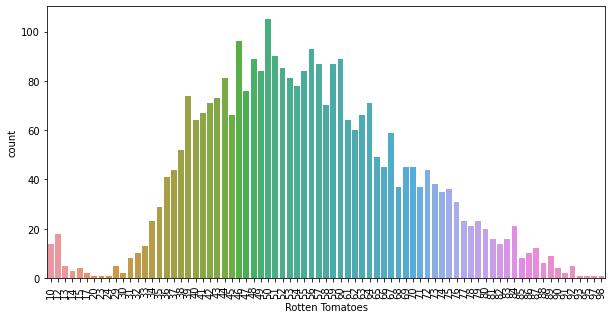

In [ ]:
#กราฟคะแนนโดยรวมของ Netflix
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=merge_rt_nf['Rotten Tomatoes'])
plt.show()

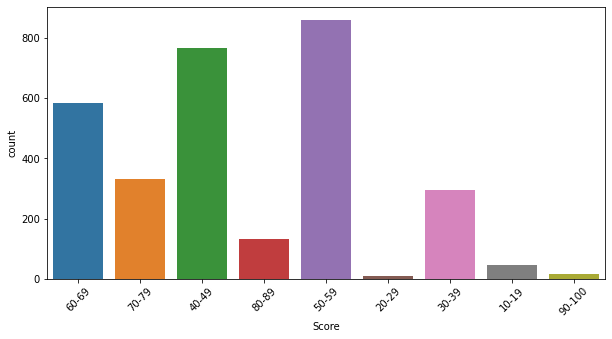


-----------Netflix Score-----------
50-59     860
40-49     767
60-69     585
70-79     333
30-39     296
80-89     132
10-19      46
90-100     15
20-29       8
Name: Score, dtype: int64


In [ ]:
#กราฟคะแนนโดยแบ่งตามช่วงของคะแนนของ Netflix
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=45) #หมุนตัวหนังสือ 45 องศา
sns.countplot(x=merge_rt_nf['Score'])
plt.show()

print(f'\n-----------Netflix Score-----------')
print(merge_rt_nf['Score'].value_counts())

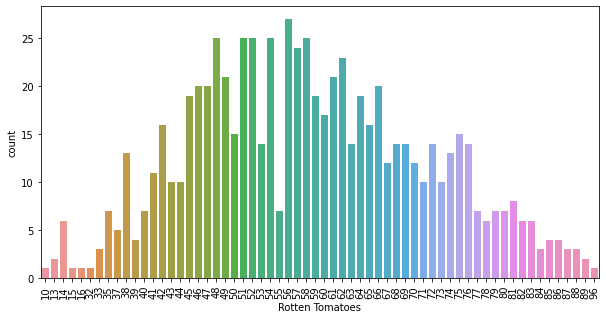

In [ ]:
#กราฟคะแนนโดยรวมของ Disney+
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=90) #หมุนตัวหนังสือ 90 องศา ให้เป็นแนวตั้ง
sns.countplot(x=merge_rt_dp['Rotten Tomatoes'])
plt.show()

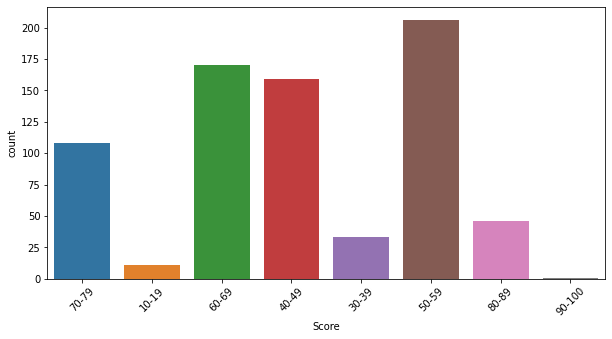


-----------Disney+ Score-----------
50-59     206
60-69     170
40-49     159
70-79     108
80-89      46
30-39      33
10-19      11
90-100      1
Name: Score, dtype: int64


In [ ]:
#กราฟคะแนนโดยแบ่งตามช่วงของคะแนนของ Disney+
a,ax=plt.subplots(figsize=(10,5)) #ปรับขนาดของกราฟ
plt.xticks(rotation=45) #หมุนตัวหนังสือ 45 องศา
sns.countplot(x=merge_rt_dp['Score'])
plt.show()

print(f'\n-----------Disney+ Score-----------')
print(merge_rt_dp['Score'].value_counts())

In [ ]:
print('-------------Netflix-------------')
print(merge_rt_nf['Rotten Tomatoes'].describe())

print('\n-------------Disney+-------------')
print(merge_rt_dp['Rotten Tomatoes'].describe())

-------------Netflix-------------
count    3042.000000
mean       54.928337
std        13.936819
min        10.000000
25%        45.000000
50%        54.000000
75%        64.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64

-------------Disney+-------------
count    734.000000
mean      58.134877
std       13.575902
min       10.000000
25%       49.000000
50%       58.000000
75%       67.000000
max       96.000000
Name: Rotten Tomatoes, dtype: float64


**จากการวิเคราะห์**

**Netflix**

> มีคะแนนเฉลี่ยอยู่ที่: 54.9 คะแนน

> หนังที่มีคะแนนต่ำที่สุดคือ: 10 คะแนน

> หนังที่มีคะแนนสูงที่สุดคือ: 98 คะแนน

> จากหนังทั้งหมด 3042 เรื่อง


**Disney+**

> มีคะแนนเฉลี่ยอยู่ที่: 58.1 คะแนน

> หนังที่มีคะแนนต่ำที่สุดคือ: 10 คะแนน

> หนังที่มีคะแนนสูงที่สุดคือ: 96 คะแนน

> จากหนังทั้งหมด 734 เรื่อง

---

# **Model the Data**

## **กราฟประเภทของหนัง ระหว่าง Netflix และ Disney+**


In [ ]:
#กำหนด Type list ของข้อมูล
typelist=['Drama', 'Comedy','Triller','Musical','Adventure','Animation','Family','Kid','Documentaries']

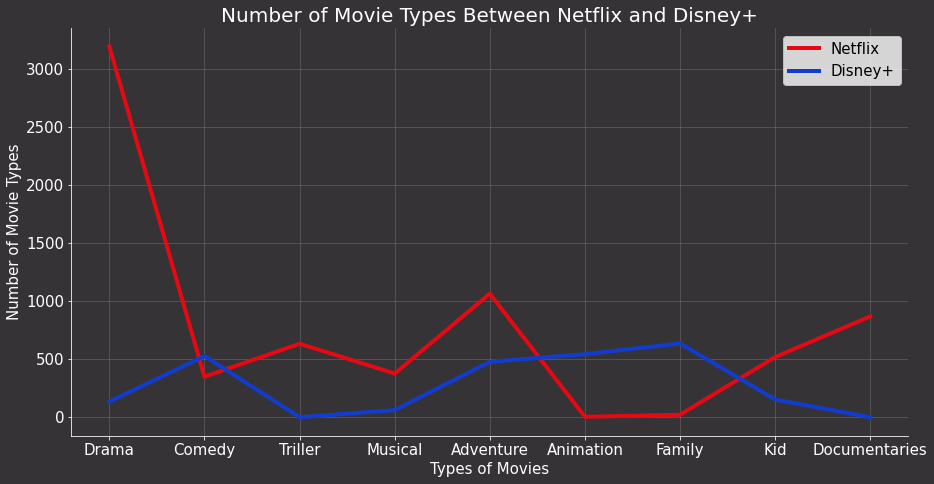

In [ ]:
#ปรับแต่งกราฟ
fig, ax = plt.subplots(figsize=(15,7.5),facecolor="#363336") #figsize = ปรับขนาดกราฟ | facecolor = ปรับสีรอบกราฟ
ax.patch.set_facecolor('#363336') #ปรับสีด้านในกราฟ

#พล็อตกราฟ | label = เพิ่มชื่อข้อมูลของเส้น | lw = linewidth = ความหนาของเส้น
ax1 = sns.lineplot(x=typelist, y=type_nf, color = nf_color, label = 'Netflix', lw = 4)
ax2 = sns.lineplot(ax=ax, x=typelist, y=type_dp, color = dp_color, label = 'Disney+', lw = 4)
plt.legend(fontsize=15) #ขนาดตัวอักษร label มุมขวาบน

#ปรับแต่งกราฟ | labelsize = ขนาดตัวหนังสือ
ax.tick_params(axis='x', colors='#FFFFFF', labelsize=15)
ax.tick_params(axis='y', colors='#FFFFFF', labelsize=15)

#เพิ่มชื่อกราฟ
plt.title('Number of Movie Types Between Netflix and Disney+', fontsize=20, color = '#FFFFFF')

#เพิ่มชื่อ label ของ x และ y
plt.xlabel('Types of Movies', color = '#FFFFFF', fontsize = 15)
plt.ylabel('Number of Movie Types', color = '#FFFFFF', fontsize = 15)

#เปลี่ยนสีเส้นขอบ
ax.spines['bottom'].set_color('#FFFFFF')
ax.spines['left'].set_color('#FFFFFF')

#ทำให้เส้นขอบหายไป | True = visible | False = invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#เพิ่มเส้น grid ในกราฟ | alpha = ความชัดของเส้น
ax.grid(True, alpha=0.3)

#เพิ่มข้อความในกราฟ
#plt.text(0, 835, 'Type of Movies', fontsize = 20, color = '#FFFFFF')

plt.show()

## **กราฟประเภทและจำนวนเรทติ้ง ระหว่าง Netflix และ Disney+**

In [ ]:
#กำหนดข้อมูลช่วงอายุ
age=['Kid','7+','13+','16+','18+']
kid_nf=41+307+220
kid_dp=253+318+50
nf_7p=287+334+6+863
dp_7p=236+131+13+301
nf_13p=490
df_13p=66
nf_16p=2160
df_16p=79
nf_18p=3+84+799+3207
df_18p=3

rating_nf=[kid_nf,nf_7p,nf_13p,nf_16p,nf_18p]
rating_dp=[kid_dp,dp_7p,df_13p,df_16p,df_18p]

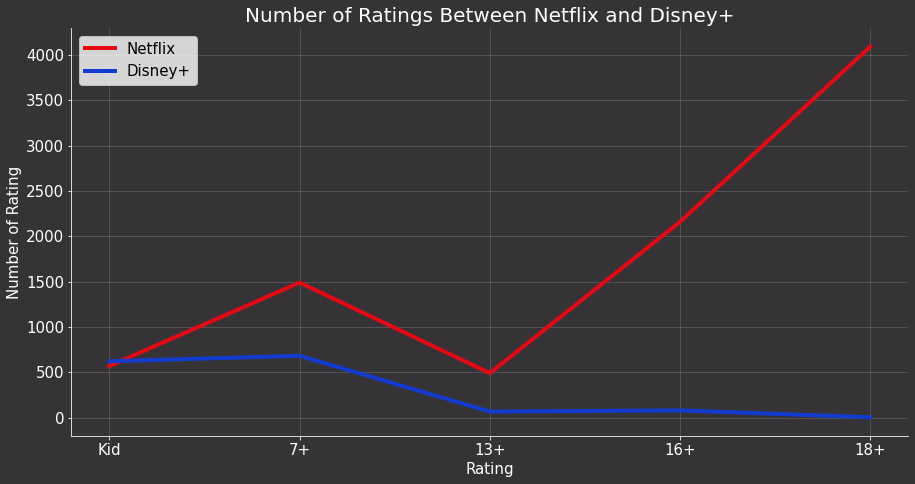

In [ ]:
#ปรับแต่งกราฟ
fig, ax = plt.subplots(figsize=(15,7.5),facecolor="#363336") #figsize = ปรับขนาดกราฟ | facecolor = ปรับสีรอบกราฟ
ax.patch.set_facecolor('#363336') #ปรับสีด้านในกราฟ

#พล็อตกราฟ | label = เพิ่มชื่อข้อมูลของเส้น | lw = linewidth = ความหนาของเส้น
ax1 = sns.lineplot(x=age, y=rating_nf, color = nf_color, label = 'Netflix', lw = 4)
ax2 = sns.lineplot(ax=ax, x=age, y=rating_dp, color = dp_color, label = 'Disney+', lw = 4)
plt.legend(fontsize=15) #ขนาดตัวอักษร label มุมขวาบน

#ปรับแต่งกราฟ | labelsize = ขนาดตัวหนังสือ
ax.tick_params(axis='x', colors='#FFFFFF', labelsize=15)
ax.tick_params(axis='y', colors='#FFFFFF', labelsize=15)

#เพิ่มชื่อกราฟ
plt.title('Number of Ratings Between Netflix and Disney+', fontsize=20, color = '#FFFFFF')

#เพิ่มชื่อ label ของ x และ y
plt.xlabel('Rating', color = '#FFFFFF', fontsize = 15)
plt.ylabel('Number of Rating', color = '#FFFFFF', fontsize = 15)

#เปลี่ยนสีเส้นขอบ
ax.spines['bottom'].set_color('#FFFFFF')
ax.spines['left'].set_color('#FFFFFF')

#ทำให้เส้นขอบหายไป | True = visible | False = invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#เพิ่มเส้น grid ในกราฟ | alpha = ความชัดของเส้น
ax.grid(True, alpha=0.3)

#เพิ่มข้อความในกราฟ
#plt.text(0, 835, 'Number of Ratings', fontsize = 20, color = '#FFFFFF')

plt.show()

## **กราฟปีที่มีการเพิ่มหนังเข้ามาระหว่าง Netflix และ Disney+**

In [ ]:
#กำหนดข้อมูลช่วงปี
year=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
year_nf=[2,2,1,13,3,11,24,82,430,1193,1652,2017,1879, 1498]
year_dp=[0,0,0,0,0,0,0,0,0,0,0,768,352,330]

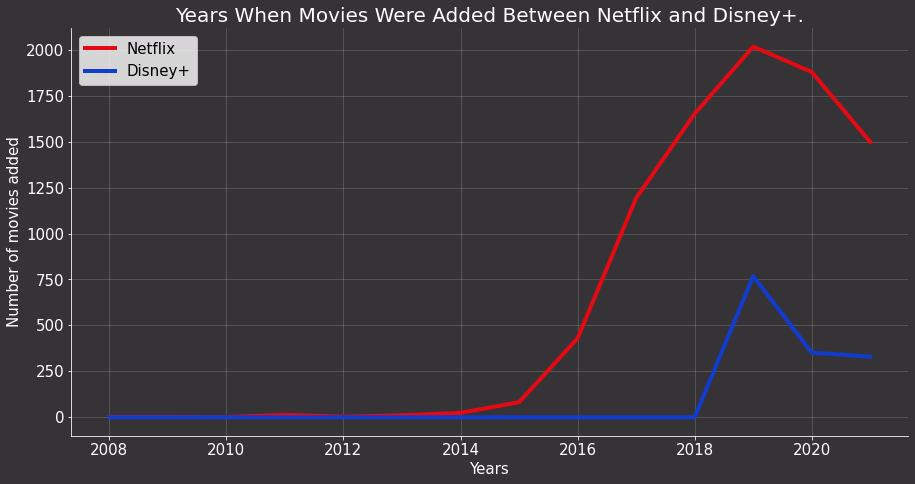

In [ ]:
#ปรับแต่งกราฟ
fig, ax = plt.subplots(figsize=(15,7.5),facecolor="#363336") #figsize = ปรับขนาดกราฟ | facecolor = ปรับสีรอบกราฟ
ax.patch.set_facecolor('#363336') #ปรับสีด้านในกราฟ

#พล็อตกราฟ | label = เพิ่มชื่อข้อมูลของเส้น | lw = linewidth = ความหนาของเส้น
ax1 = sns.lineplot(x=year, y=year_nf, color = nf_color, label = 'Netflix', lw = 4)
ax2 = sns.lineplot(ax=ax, x=year, y=year_dp, color = dp_color, label = 'Disney+', lw = 4)
plt.legend(fontsize=15) #ขนาดตัวอักษร label มุมขวาบน

#ปรับแต่งกราฟ | labelsize = ขนาดตัวหนังสือ
ax.tick_params(axis='x', colors='#FFFFFF', labelsize=15)
ax.tick_params(axis='y', colors='#FFFFFF', labelsize=15)

#เพิ่มชื่อกราฟ
plt.title('Years When Movies Were Added Between Netflix and Disney+.', fontsize=20, color = '#FFFFFF')

#เพิ่มชื่อ label ของ x และ y
plt.xlabel('Years', color = '#FFFFFF', fontsize = 15)
plt.ylabel('Number of movies added', color = '#FFFFFF', fontsize = 15)

#เปลี่ยนสีเส้นขอบ
ax.spines['bottom'].set_color('#FFFFFF')
ax.spines['left'].set_color('#FFFFFF')

#ทำให้เส้นขอบหายไป | True = visible | False = invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#เพิ่มเส้น grid ในกราฟ | alpha = ความชัดของเส้น
ax.grid(True, alpha=0.3)

#เพิ่มข้อความในกราฟ
#plt.text(0, 835, 'Year When Movies Were Added', fontsize = 20, color = '#FFFFFF')

plt.show()

## **กราฟคะแนนจาก Rotten Tomatoes ของ Netflix และ Disney+**

In [ ]:
#กำหนดช่วงของคะแนน
score=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100']
score_nf=[46,8,296,767,860,585,333,132,15]
score_dp=[11,0,33,159,206,170,108,46,1]

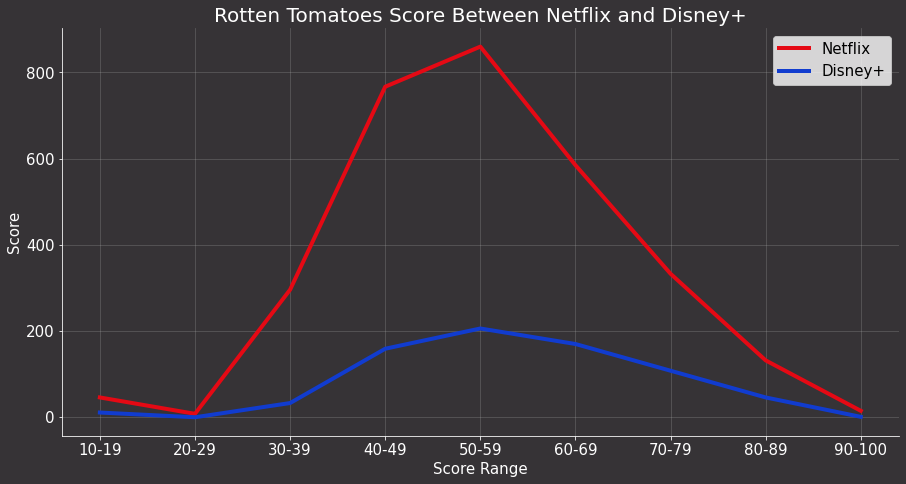

In [ ]:
#ปรับแต่งกราฟ
fig, ax = plt.subplots(figsize=(15,7.5),facecolor="#363336") #figsize = ปรับขนาดกราฟ | facecolor = ปรับสีรอบกราฟ
ax.patch.set_facecolor('#363336') #ปรับสีด้านในกราฟ

#พล็อตกราฟ | label = เพิ่มชื่อข้อมูลของเส้น | lw = linewidth = ความหนาของเส้น
ax1 = sns.lineplot(x=score, y=score_nf, color = nf_color, label = 'Netflix', lw = 4)
ax2 = sns.lineplot(ax=ax, x=score, y=score_dp, color = dp_color, label = 'Disney+', lw = 4)
plt.legend(fontsize=15) #ขนาดตัวอักษร label มุมขวาบน

#ปรับแต่งกราฟ | labelsize = ขนาดตัวหนังสือ
ax.tick_params(axis='x', colors='#FFFFFF', labelsize=15)
ax.tick_params(axis='y', colors='#FFFFFF', labelsize=15)

#เพิ่มชื่อกราฟ
plt.title('Rotten Tomatoes Score Between Netflix and Disney+', fontsize=20, color = '#FFFFFF')

#เพิ่มชื่อ label ของ x และ y
plt.xlabel('Score Range', color = '#FFFFFF', fontsize = 15)
plt.ylabel('Score', color = '#FFFFFF', fontsize = 15)

#เปลี่ยนสีเส้นขอบ
ax.spines['bottom'].set_color('#FFFFFF')
ax.spines['left'].set_color('#FFFFFF')

#ทำให้เส้นขอบหายไป | True = visible | False = invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#เพิ่มเส้น grid ในกราฟ | alpha = ความชัดของเส้น
ax.grid(True, alpha=0.3)

#เพิ่มข้อความในกราฟ
#plt.text(0, 835, 'Rotten Tomatoes Score', fontsize = 20, color = '#FFFFFF')

plt.show()